In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
plt.rcParams.update({
    "text.usetex": True,                # Use LaTeX for text
    "font.family": "serif",             # Use 'serif' font
    "font.serif": ["Computer Modern"],  # LaTeX default font
    "axes.labelsize": 14,               # Font size for labels
    "font.size": 11,                    # General font size
    "legend.fontsize": 11,              # Font size for legend
    "xtick.labelsize": 10,              # Font size for x-axis
    "ytick.labelsize": 10               # Font size for y-axis
})

In [5]:
cf_pv = pd.read_csv('../Data/verification_cf_pv_1823.csv',
                      index_col = 0,
                      parse_dates = True
                    )

In [6]:
cf_pv

,EirGrid,Atlite,C3S National,C3S Gridded bilinear,C3S Gridded nearest
time,,,,,
2018-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0
2018-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0
2018-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0
2018-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0
2018-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2023-12-31 19:00:00,0.0,0.0,0.0,0.0,0.0
2023-12-31 20:00:00,0.0,0.0,0.0,0.0,0.0
2023-12-31 21:00:00,0.0,0.0,0.0,0.0,0.0


## Verification indices

In order to quantify how good the models are, we can calculate some measures of their agreement with the EirGrid observations. Here is a list of some ideas to see this behaviour. 

Quantitative measures:
- RMSE
- Correlation coefficient
- Bias

Representations:
- 2D histogram
- Box plots to see how the quantiles are distributed for the different sources

### RMSE

In [31]:
rmse_c3se_national = np.sqrt(((cf_c3se_national-cf_eirgrid)**2).mean())
rmse_c3se_gridded = np.sqrt(((cf_c3se_gridded-cf_eirgrid)**2).mean())
rmse_c3se_nearest = np.sqrt(((cf_c3se_gridded_nearest-cf_eirgrid)**2).mean())
rmse_atlite = np.sqrt(((cf_atlite-cf_eirgrid)**2).mean())

In [32]:
print('RMSE with respect to EirGrid' + 
      '\n' + 'C3S-E national: ', rmse_c3se_national, 'C3S-E gridded: ', rmse_c3se_gridded.item(), 'atlite: ', rmse_atlite.item())

RMSE with respect to EirGrid
C3S-E national:  0.11329577841460826 C3S-E gridded:  0.08982567638771619 atlite:  0.11937013134642663


When CF is less than 0.2

In [33]:
cf_atlite = cf_atlite.to_series()
cf_c3se_gridded = cf_c3se_gridded.to_series()
cf_c3se_gridded_nearest = cf_c3se_gridded_nearest.to_series()

In [34]:
rmse_c3se_national_02 = np.sqrt(((cf_c3se_national[(cf_c3se_national <= 0.2) | (cf_eirgrid <= 0.2)] - cf_eirgrid[(cf_c3se_national <= 0.2) | (cf_eirgrid <= 0.2)])**2).mean())
rmse_c3se_gridded_02 = np.sqrt(((cf_c3se_gridded[(cf_c3se_gridded <= 0.2) | (cf_eirgrid <= 0.2)] - cf_eirgrid[(cf_c3se_gridded <= 0.2) | (cf_eirgrid <= 0.2)])**2).mean())
rmse_atlite_02 = np.sqrt(((cf_atlite[(cf_atlite <= 0.2) | (cf_eirgrid <= 0.2)] - cf_eirgrid[(cf_atlite <= 0.2) | (cf_eirgrid <= 0.2)])**2).mean())

In [35]:
print('RMSE with respect to EirGrid' + 
      '\n' + 'C3S-E national: ', rmse_c3se_national_02, 'C3S-E gridded: ', rmse_c3se_gridded_02.item(), 'atlite: ', rmse_atlite_02.item())

RMSE with respect to EirGrid
C3S-E national:  0.08736035419836735 C3S-E gridded:  0.059948790072857326 atlite:  0.07744641721289196


### Correlation coefficient

In [36]:
corrcoef_c3se_national = np.corrcoef(cf_c3se_national.fillna(0.).values,cf_eirgrid.values)[0,1]
corrcoef_c3se_gridded = np.corrcoef(cf_c3se_gridded.values, cf_eirgrid.values)[0,1]
corrcoef_c3se_nearest = np.corrcoef(cf_c3se_gridded_nearest.values, cf_eirgrid.values)[0,1]
corrcoef_atlite = np.corrcoef(cf_atlite.values, cf_eirgrid.values)[0,1]

In [37]:
print('Correlation coefficient with respect to EirGrid' + '\n' + 
      'C3S-E national: ', corrcoef_c3se_national, 'C3S-E gridded: ', corrcoef_c3se_gridded.item(), 'atlite: ', corrcoef_atlite)

Correlation coefficient with respect to EirGrid
C3S-E national:  0.9305413529403775 C3S-E gridded:  0.931136463114711 atlite:  0.9209337300539129


When CF less than 0.2

In [38]:
corrcoef_c3se_national_02 = np.corrcoef(cf_c3se_national.fillna(0.).values[(cf_c3se_national <= 0.2) | (cf_eirgrid <= 0.2)], cf_eirgrid.values[(cf_c3se_national <= 0.2) | (cf_eirgrid <= 0.2)])[0,1]
corrcoef_c3se_gridded_02 = np.corrcoef(cf_c3se_gridded.values[(cf_c3se_gridded <= 0.2) | (cf_eirgrid <= 0.2)], cf_eirgrid.values[(cf_c3se_gridded <= 0.2) | (cf_eirgrid <= 0.2)])[0,1]
corrcoef_atlite_02 = np.corrcoef(cf_atlite.values[(cf_atlite <= 0.2) | (cf_eirgrid <= 0.2)], cf_eirgrid.values[(cf_atlite <= 0.2) | (cf_eirgrid <= 0.2)])[0,1]

In [39]:
print('Correlation coefficient with respect to EirGrid' + '\n' + 
      'C3S-E national: ', corrcoef_c3se_national_02, 'C3S-E gridded: ', corrcoef_c3se_gridded_02.item(), 'atlite: ', corrcoef_atlite_02)

Correlation coefficient with respect to EirGrid
C3S-E national:  0.7413254486946453 C3S-E gridded:  0.7349130111797456 atlite:  0.7068038660165872


### Bias

In [40]:
mean_bias_c3se_national = (cf_c3se_national.fillna(0.)-cf_eirgrid).mean()
mean_bias_c3se_gridded = (cf_c3se_gridded-cf_eirgrid).mean()
mean_bias_c3se_nearest = (cf_c3se_gridded_nearest-cf_eirgrid).mean()
mean_bias_atlite = (cf_atlite-cf_eirgrid).mean()

In [41]:
print('Bias with respect to EirGrid' + '\n' + 
      'C3S-E national: ', mean_bias_c3se_national, 'C3S-E gridded: ', mean_bias_c3se_gridded.item(), 'atlite: ', mean_bias_atlite.item())

Bias with respect to EirGrid
C3S-E national:  0.020976181189873436 C3S-E gridded:  0.02709879588853322 atlite:  0.04584787906269446


CF less than 0.2

In [42]:
mean_bias_c3se_national_02 = (cf_c3se_national.fillna(0.)[(cf_c3se_national <= 0.2) | (cf_eirgrid <= 0.2)] - cf_eirgrid[(cf_c3se_national <= 0.2) | (cf_eirgrid <= 0.2)]).mean()
mean_bias_c3se_gridded_02 = (cf_c3se_gridded[(cf_c3se_gridded <= 0.2) | (cf_eirgrid <= 0.2)] - cf_eirgrid[(cf_c3se_gridded <= 0.2) | (cf_eirgrid <= 0.2)]).mean()
mean_bias_atlite_02 = (cf_atlite[(cf_atlite <= 0.2) | (cf_eirgrid <= 0.2)] - cf_eirgrid[(cf_atlite <= 0.2) | (cf_eirgrid <= 0.2)]).mean()

In [43]:
print('Bias with respect to EirGrid' + '\n' + 
      'C3S-E national: ', mean_bias_c3se_national_02, 'C3S-E gridded: ', mean_bias_c3se_gridded_02.item(), 'atlite: ', mean_bias_atlite_02.item())

Bias with respect to EirGrid
C3S-E national:  0.008095213052968406 C3S-E gridded:  0.010118159461661183 atlite:  0.0184866888488632


# Countour Plot

In [ ]:
# cm / in ratio
cm =1/2.54

In [46]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = truncate_colormap(mpl.colormaps['hot'], minval=0.1, maxval=0.95)
cmap = cmap.resampled(7)

In [ ]:
bins = np.arange(-0.025, 1.05, 0.05)
centered_bins = 0.5*(bins[1:]+bins[:-1])

hist0, _, _ = np.histogram2d(x=cf_pv['C3S National'].fillna(0.).values,
                             y=cf_pv['EirGrid'].values,
                             bins=bins, density=False
                             )
hist1, _, _ = np.histogram2d(x=cf_pv['C3S Gridded'].values,
                             y=cf_pv['EirGrid'].values,
                             bins=bins, density=False
                             )
hist2, _, _ = np.histogram2d(x=cf_pv['Atlite'].values,
                             y=cf_pv['EirGrid'].values,
                             bins=bins, density=False
                             )

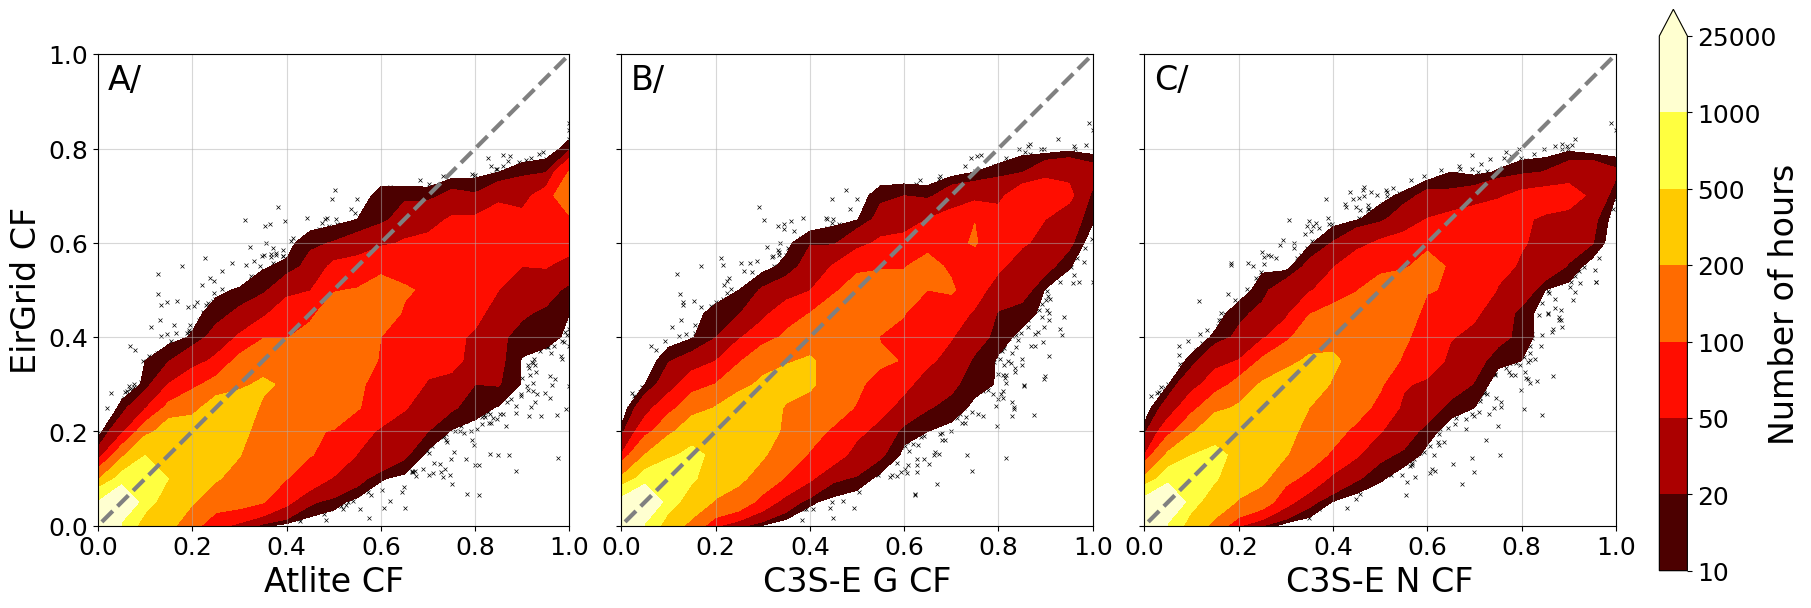

In [ ]:
bounds = [10, 20, 50, 100, 200, 500, 1000, 25000]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(1,3, figsize=(17*cm, 6*cm), constrained_layout=True)

ax[0].set_aspect(1.)
ax[1].set_aspect(1.)
ax[2].set_aspect(1.)

ax[2].scatter(x=cf_pv['C3S National'].fillna(0.).values, y=cf_pv['C3S National'].values, marker='x', c='k', s=8, linewidth=0.5)
img0 = ax[2].contourf(centered_bins, centered_bins, hist0.T, levels=bounds, cmap=cmap, norm=norm, extend='max')

ax[1].scatter(x=cf_pv['C3S Gridded'].values, y=cf_pv['C3S Gridded'].values, marker='x', c='k', s=8, linewidth=0.5)
img1 = ax[1].contourf(centered_bins, centered_bins, hist1.T, levels=bounds, cmap=cmap, norm=norm, extend='max')

ax[0].scatter(x=cf_pv['Atlite'].values, y=cf_pv['EirGrid'].values, marker='x', c='k', s=8, linewidth=0.5)
img2 = ax[0].contourf(centered_bins, centered_bins, hist2.T, levels=bounds, cmap=cmap, norm=norm, extend='max')

# cbar0 = fig.colorbar(img0, ax=ax[0])
# cbar1 = fig.colorbar(img1, ax=ax[1])
cbar2 = fig.colorbar(img2, ax=ax[2])

# cbar0.set_label('Number of hours', fontsize=14, labelpad=-10)
# cbar0.ax.tick_params(labelsize=12)

# cbar1.set_label('Number of hours', fontsize=14, labelpad=-10)
# cbar1.ax.tick_params(labelsize=12)

cbar2.set_label('Number of hours', fontsize=24, labelpad=-6, color='k')
cbar2.ax.tick_params(labelsize=18)

ax[2].set_xlabel('C3S-E N CF', fontsize=24, color='k')
ax[0].set_ylabel('EirGrid CF', fontsize=24, color='k')
ax[0].tick_params(labelsize=18)

ax[1].set_xlabel('C3S-E G CF', fontsize=24, color='k')
# ax[1].set_ylabel('EirGrid', fontsize=14)
ax[1].tick_params(labelsize=18)
ax[1].set_yticklabels([])

ax[0].set_xlabel('Atlite CF', fontsize=24, color='k')
# ax[2].set_ylabel('EirGrid', fontsize=14)
ax[2].tick_params(labelsize=18)
ax[2].set_yticklabels([])

ax[0].plot(bins, bins, c='gray', lw=3, ls='--')
ax[1].plot(bins, bins, c='gray', lw=3, ls='--')
ax[2].plot(bins, bins, c='gray', lw=3, ls='--')

ax[0].set_xlim(0,1)
ax[0].set_ylim(0,1)
ax[1].set_xlim(0,1)
ax[1].set_ylim(0,1)
ax[2].set_xlim(0,1)
ax[2].set_ylim(0,1)

ax[0].grid(alpha=0.5)
ax[1].grid(alpha=0.5)
ax[2].grid(alpha=0.5)

ax[0].text(0.02,0.98,'A/', fontsize=24, ha='left', va='top')
ax[1].text(0.02,0.98,'B/', fontsize=24, ha='left', va='top')
ax[2].text(0.02,0.98,'C/', fontsize=24, ha='left', va='top')

plt.savefig('../Figures/pv_verification_contour.pdf', dpi=300, bbox_inches='tight')